In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [3]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target


In [4]:
###
#IMPORT LOGISTIC REGRESSION MODEL USING sklearn
###
from sklearn.linear_model import LogisticRegression
###
# Define the model (SHOULD NOT BE MORE THAN 1 LINE OF CODE)
###
model= LogisticRegression(random_state=0)
train_size, train_score, validation_score = learning_curve(estimator=model, X=X, y=y, cv=5)

train_score_m_LR = np.mean(train_score, axis=1)
validation_score_m_LR = np.mean(validation_score, axis=1)

/Users/meganpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/meganpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [5]:
###
#IMPORT KNN CLASSIFIER MODEL USING sklearn
###
from sklearn.neighbors import KNeighborsClassifier
###
# Define the 2-NN model (SHOULD NOT BE MORE THAN 1 LINE OF CODE)
###

model = KNeighborsClassifier(n_neighbors=3)
train_size, train_score, validation_score = learning_curve(estimator=model, X=X, y=y, cv=5)

train_score_m_KNN2 = np.mean(train_score, axis=1)
validation_score_m_KNN2 = np.mean(validation_score, axis=1)

In [6]:
###
#IMPORT DECISION TREE CLASSIFIER USING sklearn
###
from sklearn.tree import DecisionTreeClassifier
###
# Define the DECISION TREE CLASSIFIER model (SHOULD NOT BE MORE THAN 1 LINE OF CODE)
###

model = DecisionTreeClassifier(criterion='entropy')
train_size, train_score, validation_score = learning_curve(estimator=model, X=X, y=y, cv=5)

train_score_m_DT = np.mean(train_score, axis=1)
validation_score_m_DT = np.mean(validation_score, axis=1)

In [7]:
###
# Convert training and validation scores to training and validation errors here.
# Run the below piece of code to get your final learning curves.
###

error_train_score_m_LR = 1 -train_score_m_LR
error_validation_score_m_LR = 1 -validation_score_m_LR

error_train_score_m_KNN2 = 1 - train_score_m_KNN2
error_validation_score_m_KNN2 = 1 -validation_score_m_KNN2

error_train_score_m_DT = 1 -train_score_m_DT
error_validation_score_m_DT = 1 -validation_score_m_DT



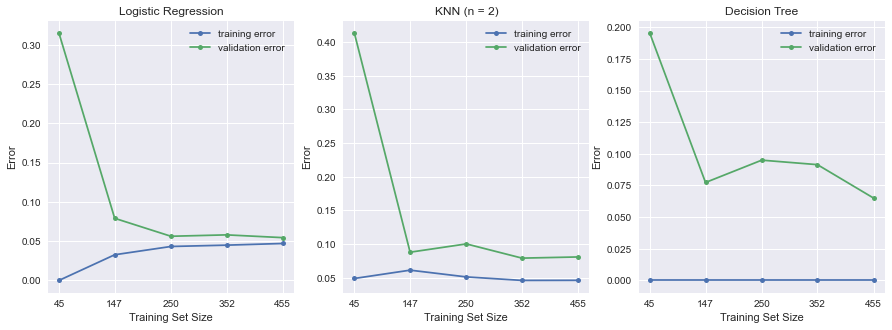

In [8]:
plt.style.use('seaborn')

f, ((ax11, ax12, ax13)) = plt.subplots(1, 3, figsize=(15,5))
X_axis = train_size
# Y_axis = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

ax11.set_xlabel('Training Set Size')
ax11.set_ylabel('Error')
ax11.set_xticks(X_axis)
# ax11.set_yticks(Y_axis)
ax11.set_title('Logistic Regression')
ax11.plot(X_axis, error_train_score_m_LR, 'o-', markersize=5, label="training error")
ax11.plot(X_axis, error_validation_score_m_LR, 'o-', markersize=5, label="validation error")
ax11.legend()

ax12.set_xlabel('Training Set Size')
ax12.set_ylabel('Error')
ax12.set_xticks(X_axis)
# ax12.set_yticks(Y_axis)
ax12.set_title('KNN (n = 2)')
ax12.plot(X_axis, error_train_score_m_KNN2, 'o-', markersize=5, label="training error")
ax12.plot(X_axis, error_validation_score_m_KNN2, 'o-', markersize=5, label="validation error")
ax12.legend()

ax13.set_xlabel('Training Set Size')
ax13.set_ylabel('Error')
ax13.set_title('Decision Tree')
ax13.set_xticks(X_axis)
# ax13.set_yticks(Y_axis)
ax13.plot(X_axis, error_train_score_m_DT, 'o-', markersize=5, label="training error")
ax13.plot(X_axis, error_validation_score_m_DT, 'o-', markersize=5, label="validation error")
ax13.legend()

plt.show()